In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
# from tensorflow import keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# cifar10 = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
x_train ,x_test = x_train/255.0,x_test/255.0

In [ ]:
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

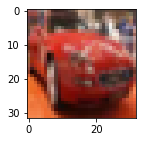

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[5],cmap=plt.cm.binary)
plt.show()

In [ ]:
# model = tf.keras.models.Sequential()

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)


In [ ]:
history = model.fit(
      x_train,
      y_train,
      epochs=10,
      verbose=2,
      batch_size=64
    )

Epoch 1/10
782/782 - 7s - loss: 2.3075 - 7s/epoch - 9ms/step
Epoch 2/10
782/782 - 3s - loss: 2.3037 - 3s/epoch - 3ms/step
Epoch 3/10
782/782 - 3s - loss: 2.3038 - 3s/epoch - 3ms/step
Epoch 4/10
782/782 - 3s - loss: 2.3037 - 3s/epoch - 3ms/step
Epoch 5/10
782/782 - 3s - loss: 2.3035 - 3s/epoch - 3ms/step
Epoch 6/10
782/782 - 3s - loss: 2.3036 - 3s/epoch - 3ms/step
Epoch 7/10
782/782 - 3s - loss: 2.3036 - 3s/epoch - 3ms/step
Epoch 8/10
782/782 - 3s - loss: 2.3035 - 3s/epoch - 3ms/step
Epoch 9/10
782/782 - 3s - loss: 2.3037 - 3s/epoch - 3ms/step
Epoch 10/10
782/782 - 3s - loss: 2.3038 - 3s/epoch - 3ms/step


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

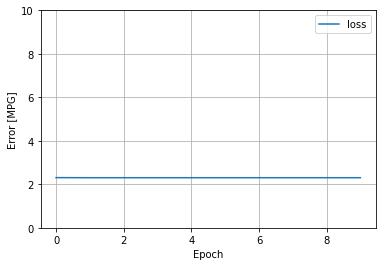

In [ ]:
plot_loss(history)

In [ ]:
model.evaluate(
   x_test,
   y_test,
   batch_size=64,
   verbose=1 
)

157/157 [==============================] - 1s 3ms/step - loss: 2.3032


2.3031957149505615

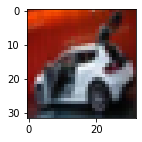

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[6],cmap=plt.cm.binary)
plt.show()

In [ ]:
x_test[6].shape

(32, 32, 3)

In [ ]:
# t=np.reshape(, (None,32,32,3))
image = np.asarray(x_test[6])[None, ...]

In [ ]:
image.shape

(1, 32, 32, 3)

In [ ]:
predict=model.predict(image)

In [ ]:
np.argmax(predict)

3

In [ ]:
# save model

In [ ]:
# save whole model
model.save("nn1.h5")
model.save("nn2")

In [ ]:
new_model1 = tf.keras.models.load_model("/content/nn1.h5")

In [ ]:
# save weights
model.save_weights("nn_weights.h5")

In [ ]:
#initialize 
weights = model.load_weights("/content/nn_weights.h5")

In [ ]:
weights

In [ ]:
# save the architeture
json_string = model.to_json()

with open("nn_model.json","w") as f:
  f.write(json_string)


In [ ]:
with open("nn_model.json","r") as f:
  laod_json_string =f.read()

In [ ]:
laod_json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "d

In [ ]:
new_model2 = tf.keras.models.model_from_json(laod_json_string)
new_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# new to retrain